In [ ]:
#| hide
import fdtd_python.fdtd_python as fd
import numpy as np

# fdtd_python

> A python package to run fdtd simulations

## Developer Guide

If you are new to using `nbdev` here are some useful pointers to get you started.

### Install fdtd_python in Development mode

```sh
# make sure fdtd_python package is installed in development mode
$ pip install -e .

# make changes under nbs/ directory
# ...

# compile to have changes apply to fdtd_python
$ nbdev_prepare
```

## Usage

### Installation

Install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/gbeane66/fdtd_python.git
```

or from [conda][conda]

```sh
$ conda install -c gbeane66 fdtd_python
```

or from [pypi][pypi]


```sh
$ pip install fdtd_python
```


[repo]: https://github.com/gbeane66/fdtd_python
[docs]: https://gbeane66.github.io/fdtd_python/
[pypi]: https://pypi.org/project/fdtd_python/
[conda]: https://anaconda.org/gbeane66/fdtd_python

### Documentation

Documentation can be found hosted on this GitHub [repository][repo]'s [pages][docs]. Additionally you can find package manager specific guidelines on [conda][conda] and [pypi][pypi] respectively.

[repo]: https://github.com/gbeane66/fdtd_python
[docs]: https://gbeane66.github.io/fdtd_python/
[pypi]: https://pypi.org/project/fdtd_python/
[conda]: https://anaconda.org/gbeane66/fdtd_python

## How to use

Define the refractive index and thickness of the layers in the simulation. The refractive index is defined as a list of floats, and the thickness is defined as a list of floats. The length of the two lists must be equal.

```python
n = [1.5, 2.5]  # refractive index of the layers
d = [0.2, 500]  # thickness of the layers in micrometers
```

The fdtd settings class is used to define the simulation settings. The class takes the following parameters:
- `simulation_time`: The total time of the simulation in picoseconds.
- `simulation_size`: The size of the simulation in micrometers.
- `d`: The thickness of the layers in micrometers.
- `n`: The refractive index of the layers.


In [ ]:
n = [1.5,2.5]
d = [0.2,500]
settings = fd.fdtd_settings(2500.,16.,d,n)

The simulation is then run using the function is then run using the function `fdtd_run`:

```python
wavelength = 600  # wavelength in micrometers
N_w = 100  # number of points per wavelength
settings = fd.fdtd_settings(2500., 16., d, n)
fd.fdtd_run(wavelength, N_w, settings)
```

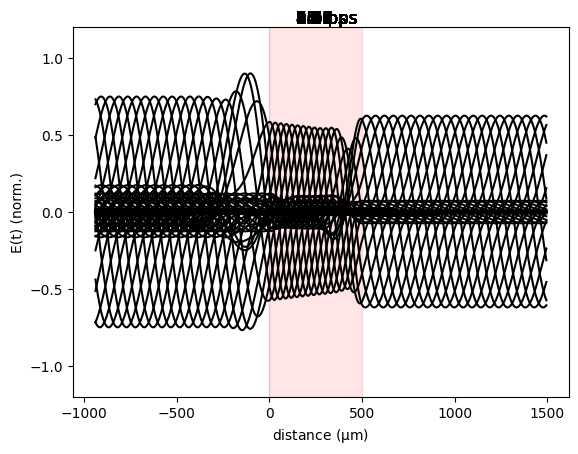

In [ ]:
length_array, time_array, E_field = fd.fdtd_run(600, 100, settings)

In [ ]:
np.shape(E_field)

(407, 800)

[<matplotlib.lines.Line2D>]

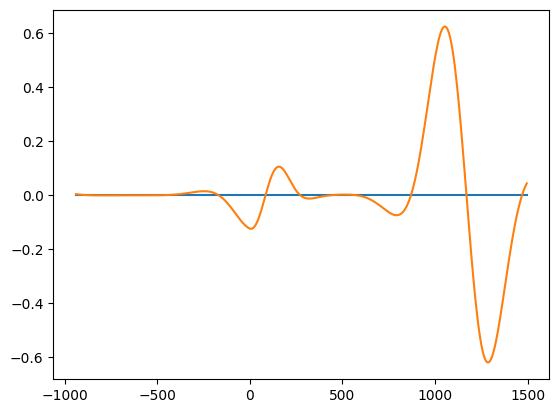

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(length_array, E_field[:,0], label='E-field at t=0')
ax.plot(length_array, E_field[:,600], label='E-field at t=0')